In [40]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget

def process(A, B, xinit, xtarget,N):
    # x = [x, y, xd, yd]
    xl = [xinit]
    yl = [xinit[0:2]]
    x = xinit
    t = 0
    dt = 0.01
    for i in range(N):

        # err 
        u = xtarget - x[:2]
        xd = A@x + B@u

        x = x + xd*dt
        xl.append(x)
        y = x[0:2]

    return np.array(xl), np.array(yl)

xinit = np.array([0, 0, 0, 0])

kx = -5
ky = -1
cx = -5
cy = -5
A =  np.array([[0, 0, 1, 0],  [0, 0, 0, 1], [kx, 0, cx, 0], [0, ky, 0, cy]])
B  = 0.08*np.array([[1, 0], [0, 1], [0, 0], [0, 0]])
xl, yl = process(A, B, xinit, np.array([150, 150]), 2000)

np.array(xl)

plt.plot(xl[:, 0], xl[:, 1])


{'clicks': [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fa

/tmp/ipykernel_28804/1797314244.py:46: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(time/1e6, x_target, y_target, '.', label = "target", marker = 'x', markersize = 10)


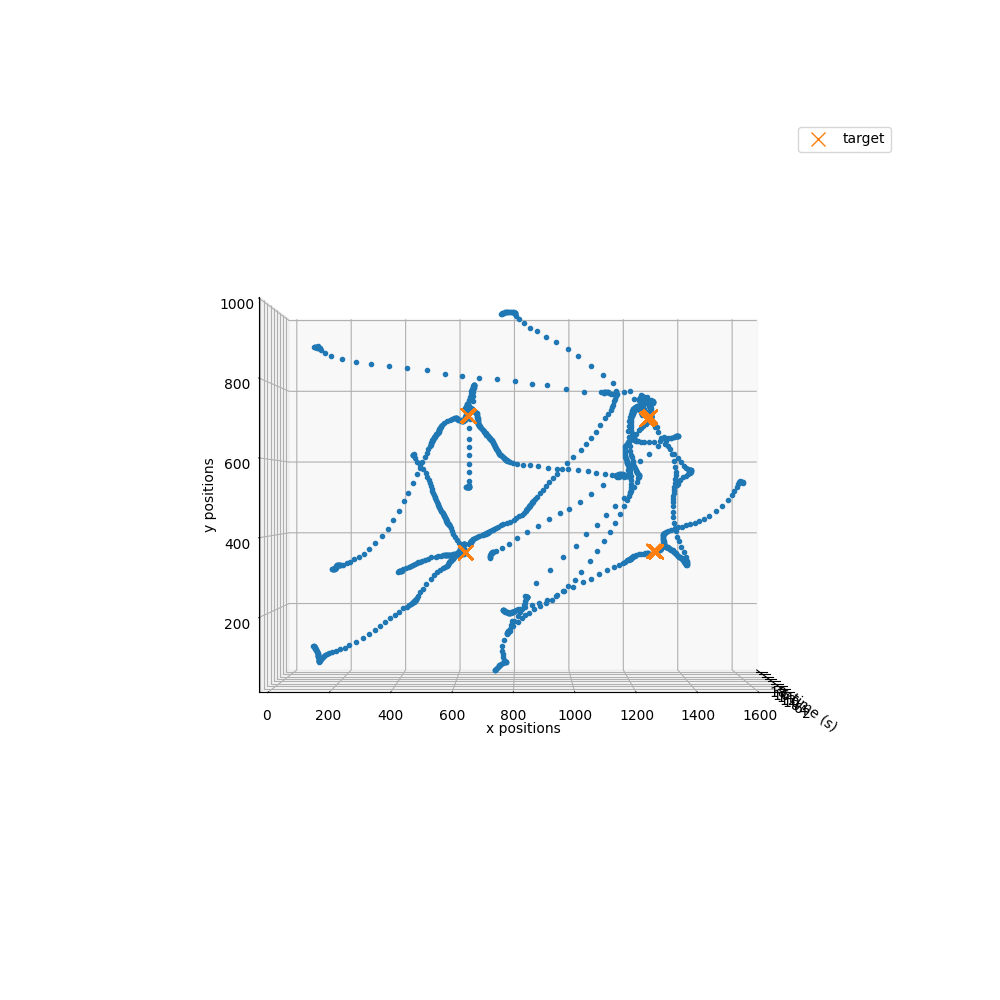

In [41]:
import numpy as np
import json

logs_dir = "../logs/"
file = "humantrace_2x2_5h2025-05-20.log"
with open(logs_dir + file, "r") as f:
# with open("gaming_trace_process_3x3_5h.log", "r") as f:

    data = json.load(f)
    print(data)

time = np.array(data['time'])



idx = np.where(time<0.1666)[0]


# time = np.diff(time[idx], prepend=0)
time = np.delete(time, idx)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(time/1e6, data["pos_x"], data["pos_y"], '.')
ax.set_xlabel("time (s)")
ax.set_ylabel("x positions")
ax.set_zlabel("y positions")


# ax = fig.add_subplot(212)
# ax.plot(data["disp_x"], data["disp_y"], '.')


disp_y = np.array(data["disp_y"])
disp_x = np.array(data["disp_x"])

idxs = np.where(np.sqrt(disp_y**2 + disp_x**2)<100)[0]

disp_x = disp_x[idxs]
disp_y = disp_y[idxs]

print("len disp_x : ", len(disp_x))
# ax.plot(disp_x, disp_y, '.')
x_target = data['target_x']
y_target = data['target_y']
plt.plot(time/1e6, x_target, y_target, '.', label = "target", marker = 'x', markersize = 10)
len(x_target)
len(time)
ax.view_init(elev=0, azim=180, roll=0)
ax.yaxis.set_inverted(True)
ax.legend()
plt.show()

In [42]:
len(time)
# data['disp_x'].sort()
# data['disp_x']

1337

ValueError: x and y must have same first dimension, but have shapes (1337,) and (1404,)

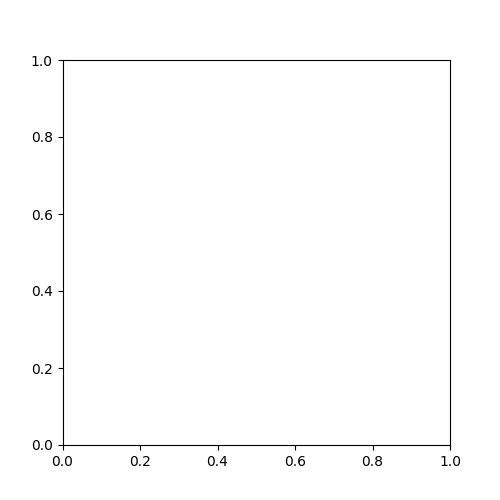

In [43]:
np.array(data['clicks'], dtype=int)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.plot(time/1e6, np.array(data['clicks'], dtype=int), '-')
ax.set_xlabel("time (s)")
ax.set_ylabel("clicks")

plt.show()